## COGS 118b Final Project - Unsupervised vs. Supervised on Classification Problem

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve

In [2]:
data = pd.read_csv('cardio_train.csv',sep = ';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### Edit Data

In [4]:
# id is unuseful
data = data.drop('id', axis = 1)

In [5]:
# change age column
data['age'] = data['age']/365

In [6]:
#find gender to numbers
h1 = data[data["gender"]==1]["height"].mean()
h2 = data[data["gender"]==2]["height"].mean()
w1 = data[data["gender"]==1]["weight"].mean()
w2 = data[data["gender"]==2]["weight"].mean()
print('height1: '+ str(h1) +' height2: ' + str(h2))
print('weight1: '+ str(w1) +' weight2: ' + str(w2))

height1: 161.35561168460356 height2: 169.94789538210054
weight1: 72.5656050955414 weight2: 77.257306906416


#### gender == 1 is woman and gender == 2 is man, because the average height and weight of man are higher than woman

In [7]:
#Now, 1 stands for woman, 0 is man
data["gender"] = data["gender"].apply(lambda x: 0 if x==2 else 1)

## EDA

(array([35021.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 34979.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

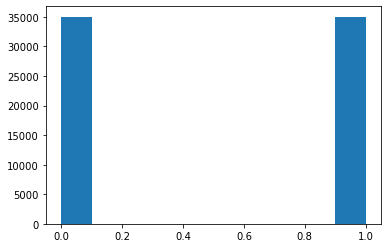

In [8]:
#porpotion of cardiovacular 
plt.hist(data['cardio'])

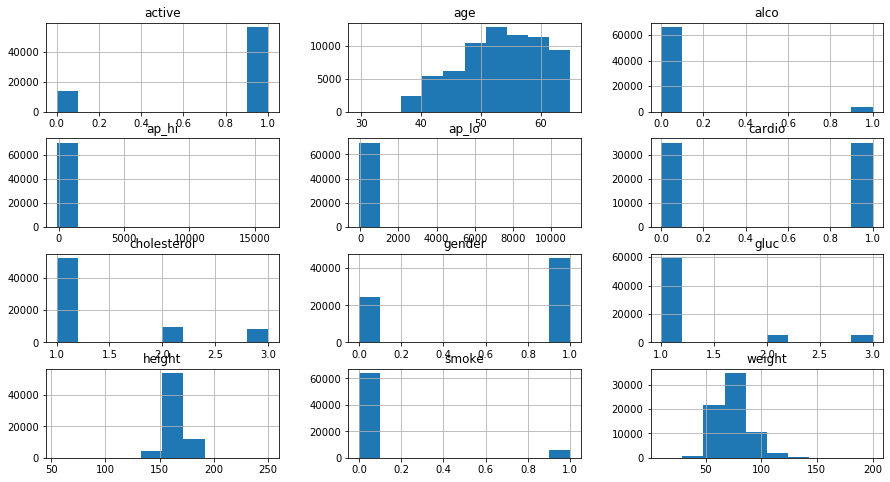

In [9]:
data.hist(figsize = (15,8))
plt.show()

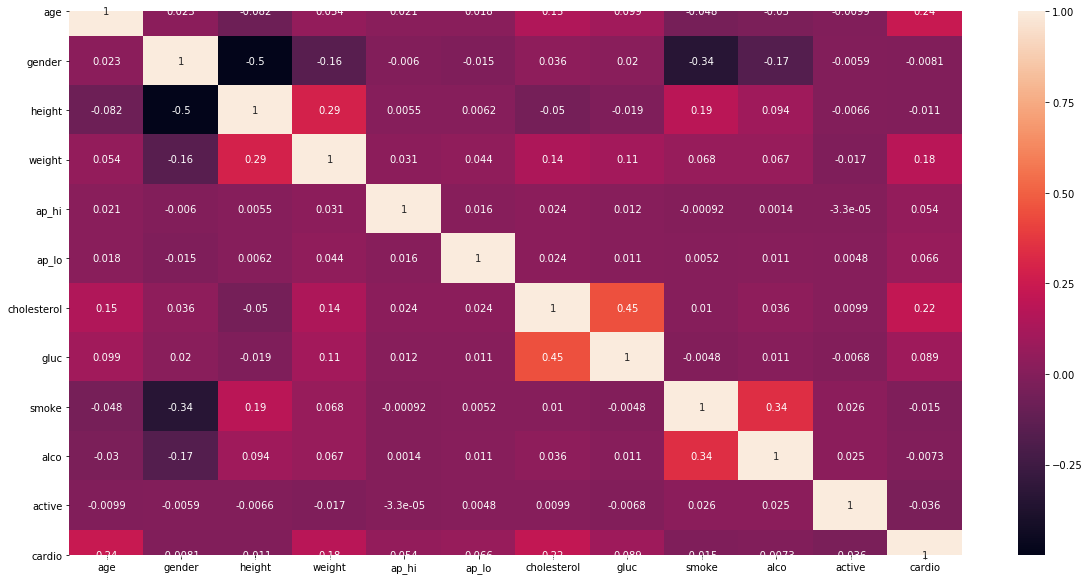

In [10]:
#heat map
corr = data.corr()
f, ax = plt.subplots(figsize = (20,10))
sns.heatmap(corr, annot=True, ax=ax)

In [11]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,0,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,0,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


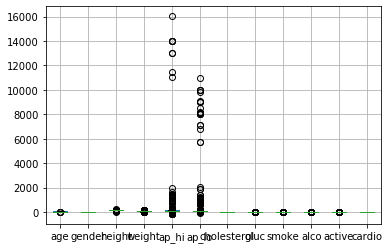

In [12]:
#check non-binary column
data.boxplot()

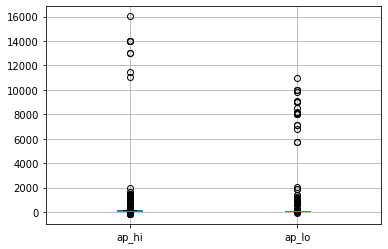

In [13]:
data.boxplot(column = ['ap_hi', 'ap_lo'])

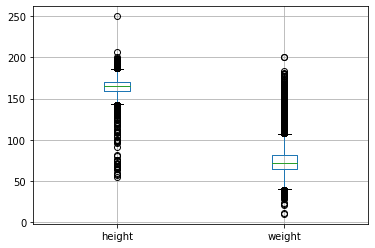

In [14]:
data.boxplot(column = ['height', 'weight'])

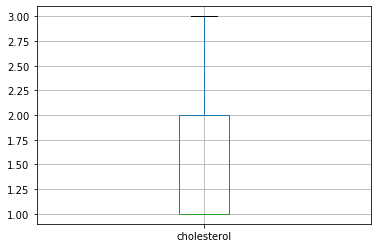

In [15]:
data.boxplot(column = ['cholesterol'])

In [16]:
# non_binary = ['height', 'weight','ap_hi', 'ap_lo','cholesterol']
# fig1, ax1 = plt.subplots()
# ax1.set_title('Basic Plot')
# ax1.boxplot(data[non_binary])

### Train test data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#define x and y
X = data[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol','gluc', 'smoke', 'alco', 'active']]
y = data[['cardio']]

In [19]:
#test size 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Supervised Method - Classification - Logistics Regression 

In [20]:
sacc = []

In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_predict = clf.predict(X_test)
clf.score(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7234285714285714

In [22]:
sacc.append(clf.score(X_test, y_test))
sacc

[0.7234285714285714]

In [23]:
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import roc_curve 

In [24]:
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

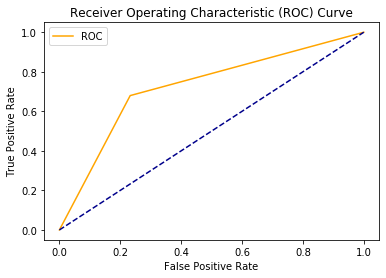

In [25]:
fper_lr, tper_lr, thresholds = roc_curve(y_test, y_predict)
plot_roc_curve(fper_lr, tper_lr)

In [28]:
y_score = clf.decision_function(X_test)
prec_lr, recall_lr, _ = precision_recall_curve(y_test, y_score)

In [29]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
# Precison
Precision = tp/(tp+fp)
print("The precision of this logistics model is : ",Precision)
# Recall
Recall= tp/(tp+fn)
print("The Recall score of logistics model is : ",Recall)
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("The F1_Score for this dataset is : ",F1_Score)

The precision of this logistics model is :  0.7456964006259781
The Recall score of logistics model is :  0.6795493439817456
The F1_Score for this dataset is :  0.7110878973287568


### Unsupervised - K-Means 

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [31]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)

In [32]:
y_predict = kmeans.predict(X_test)

In [33]:
accuracy_score(y_test, y_predict)

0.49914285714285717

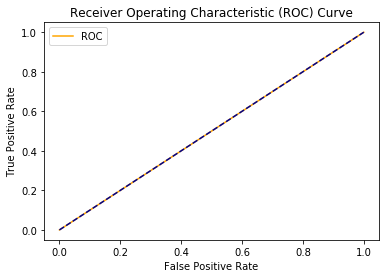

In [34]:
fper, tper, thresholds = roc_curve(y_test, y_predict)
plot_roc_curve(fper, tper)

In [35]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
# Precison
Precision = tp/(tp+fp)
print("The precision of this k-means model is : ",Precision)
# Recall
Recall= tp/(tp+fn)
print("The Recall score of k-means model is : ",Recall)
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("The F1_Score for this dataset is : ",F1_Score)

The precision of this k-means model is :  0.5
The Recall score of k-means model is :  0.0001426126640045636
The F1_Score for this dataset is :  0.000285143997718848


In [36]:
#Improved
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [37]:
# X_train_mod = X_train[['age','weight','cholesterol','gluc','smoke','active']]
# X_test_mod = X_test[['age','weight','cholesterol','gluc','smoke','active']]
# X_val_mod = X_val[['age','weight','cholesterol','gluc','smoke','active']]

In [38]:
kmeans = KMeans(n_clusters= 6, random_state=0).fit(X_train)
y_predict = kmeans.predict(X_validation)

In [39]:
X_validation['cadio'] = y_validation
X_validation['predict'] = y_predict
df = pd.DataFrame(X_validation.groupby('predict').mean()['cadio'])
df['classification'] = df['cadio'].apply(lambda x: 1 if x>=0.5 else 0)
df['cluster'] = df.index

In [40]:
change = df.to_dict()['classification']

In [41]:
change

{0: 1, 1: 1, 3: 1, 4: 1, 5: 0}

In [42]:
y_predict = kmeans.predict(X_test)

In [43]:
y_result = []
for i in y_predict:
    y_result.append(change[i])

In [44]:
accuracy_score(y_test, y_result)

0.7

In [45]:
sacc.append(accuracy_score(y_test, y_result))

In [46]:
prec_k, recall_k, _ = precision_recall_curve(y_test, y_result)

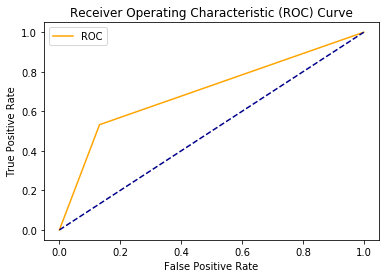

In [47]:
fper_k, tper_k, thresholds = roc_curve(y_test, y_result)
plot_roc_curve(fper_k, tper_k)

In [48]:
tn, fp, fn, tp = confusion_matrix(y_test, y_result).ravel()
# Precison
Precision = tp/(tp+fp)
print("The precision of this k-means model is : ",Precision)
# Recall
Recall= tp/(tp+fn)
print("The Recall score of k-means model is : ",Recall)
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("The F1_Score for this dataset is : ",F1_Score)

The precision of this k-means model is :  0.8021057155135367
The Recall score of k-means model is :  0.5323730747290359
The F1_Score for this dataset is :  0.6399794273958512


### Supervised - SVM

In [49]:
from sklearn import svm
clf = svm.SVC(random_state=0).fit(X_train, y_train)
y_predict = clf.predict(X_test)
clf.score(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6995

In [50]:
sacc.append(clf.score(X_test, y_test))

In [51]:
y_score = clf.decision_function(X_test)
prec_s, recall_s, _ = precision_recall_curve(y_test, y_score)

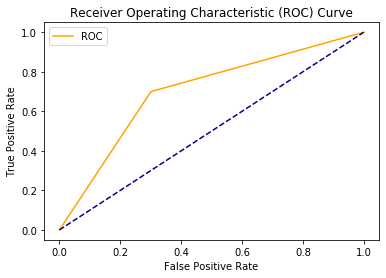

In [52]:
fper_s, tper_s, thresholds = roc_curve(y_test, y_predict)
plot_roc_curve(fper_s, tper_s)

In [53]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
# Precison
Precision = tp/(tp+fp)
print("The precision of SVM model is : ",Precision)
# Recall
Recall= tp/(tp+fn)
print("The Recall score of SVM model is : ",Recall)
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("The F1_Score for this dataset is : ",F1_Score)

The precision of SVM model is :  0.7000998715936653
The Recall score of SVM model is :  0.6998003422703936
The F1_Score for this dataset is :  0.6999500748876685


### Unsupervised - Mixture of Gaussian

In [54]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2).fit(X_train)
#labels = gmm.predict()

In [55]:
y_predict = gmm.predict(X_test)

In [56]:
accuracy_score(y_test, y_predict)

0.49914285714285717

In [57]:
#Improved
n_com = [3,4,5,6,7,8,9,10]
acc = []
for i in range(len(n_com)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state = 42)
    gmm = GaussianMixture(n_components=n_com[i], random_state = 42).fit(X_train)
    y_predict = gmm.predict(X_validation)
    X_validation['cadio'] = y_validation
    X_validation['predict'] = y_predict
    df = pd.DataFrame(X_validation.groupby('predict').mean()['cadio'])
    df['classification'] = df['cadio'].apply(lambda x: 1 if x>=0.5 else 0)
    df['cluster'] = df.index
    change = df.to_dict()['classification']
    y_predict = gmm.predict(X_test)
    y_result = []
    for p in y_predict:
        y_result.append(change[p])
    accuracy = accuracy_score(y_test, y_result)
    acc = acc + [accuracy]

In [58]:
acc

[0.5141428571428571,
 0.595,
 0.5008571428571429,
 0.5008571428571429,
 0.5317142857142857,
 0.5311428571428571,
 0.5841428571428572,
 0.5841428571428572]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [60]:
gmm = GaussianMixture(n_components=4, random_state = 42).fit(X_train)
y_predict = gmm.predict(X_validation)

In [61]:
X_validation['cadio'] = y_validation
X_validation['predict'] = y_predict
df = pd.DataFrame(X_validation.groupby('predict').mean()['cadio'])
df['classification'] = df['cadio'].apply(lambda x: 1 if x>=0.5 else 0)
df['cluster'] = df.index
change = df.to_dict()['classification']
change

{0: 0, 2: 1, 3: 1}

In [62]:
y_predict = gmm.predict(X_test)
y_result = []
for i in y_predict:
    y_result.append(change[i])

In [63]:
accuracy_score(y_test, y_result)

0.595

In [64]:
sacc.append(accuracy_score(y_test, y_result))

In [65]:
y_score = gmm.predict_proba(X_test)
y_score = y_score[:,1]
prec_m, recall_m, _ = precision_recall_curve(y_test, y_score)

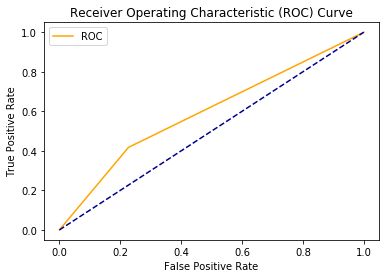

In [66]:
fper_m, tper_m, thresholds = roc_curve(y_test, y_result)
plot_roc_curve(fper_m, tper_m)

In [67]:
tn, fp, fn, tp = confusion_matrix(y_test, y_result).ravel()
# Precison
Precision = tp/(tp+fp)
print("The precision of this k-means model is : ",Precision)
# Recall
Recall= tp/(tp+fn)
print("The Recall score of k-means model is : ",Recall)
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("The F1_Score for this dataset is : ",F1_Score)

The precision of this k-means model is :  0.6486486486486487
The Recall score of k-means model is :  0.41756988020536223
The F1_Score for this dataset is :  0.5080687142113484


### Supervised - Decision tree

In [68]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_predict = clf.predict(X_test)
clf.score(X_test, y_test)

0.6302142857142857

In [69]:
sacc.append(clf.score(X_test, y_test))

In [70]:
y_score = clf.predict_proba(X_test)
y_score = y_score[:,1]
prec_d, recall_d, _ = precision_recall_curve(y_test, y_score)

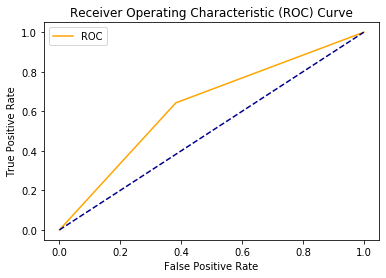

In [71]:
fper_d, tper_d, thresholds = roc_curve(y_test, y_predict)
plot_roc_curve(fper_d, tper_d)

In [72]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
# Precison
Precision = tp/(tp+fp)
print("The precision of Decision Tree model is : ",Precision)
# Recall
Recall= tp/(tp+fn)
print("The Recall score of Decision Tree model is : ",Recall)
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)

The precision of Decision Tree model is :  0.627767720373207
The Recall score of Decision Tree model is :  0.6428978893325727


### Unsupervised - DBSCAN

In [73]:
from sklearn.cluster import DBSCAN

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X_train)

In [76]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [77]:
n_clusters_

13

In [78]:
labels

array([-1, -1, -1, ..., -1, -1, -1])

In [79]:
X_train['cadio'] = y_train
X_train['predict'] = labels
df = pd.DataFrame(X_train.groupby('predict').mean()['cadio'])
df['classification'] = df['cadio'].apply(lambda x: 1 if x>=0.5 else 0)
df['cluster'] = df.index

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
change = df.to_dict()['classification']
y_predict = DBSCAN(eps=0.3, min_samples=10).fit(X_test).labels_
y_result = []
for p in y_predict:
    y_result.append(change[p])
accuracy = accuracy_score(y_test, y_result)

In [81]:
accuracy

0.5008571428571429

In [82]:
sacc.append(accuracy)

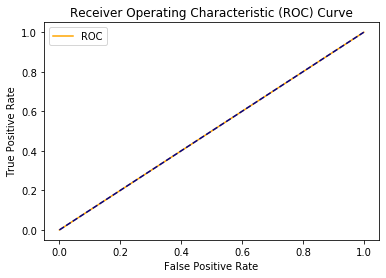

In [83]:
fper_db, tper_db, thresholds = roc_curve(y_test, y_result)
plot_roc_curve(fper_db, tper_db)

In [84]:
prec_db, recall_db, _ = precision_recall_curve(y_test, y_result)

In [86]:
eps = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
acc = []
for i in range(len(eps)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    db = DBSCAN(eps= eps[i], min_samples=10).fit(X_train)
    labels = db.labels_
    X_train['cadio'] = y_train
    X_train['predict'] = labels
    df = pd.DataFrame(X_train.groupby('predict').mean()['cadio'])
    df['classification'] = df['cadio'].apply(lambda x: 1 if x>=0.5 else 0)
    df['cluster'] = df.index
    
    change = df.to_dict()['classification']
    y_predict = DBSCAN(eps=0.3, min_samples=10).fit(X_test).labels_
    y_result = []
    for p in y_predict:
        y_result.append(change[p])
    accuracy = accuracy_score(y_test, y_result)
    acc = acc + [accuracy]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

In [87]:
acc

[0.49914285714285717,
 0.49914285714285717,
 0.5008571428571429,
 0.5008571428571429,
 0.5008571428571429,
 0.5008571428571429,
 0.5008571428571429,
 0.5008571428571429,
 0.5008571428571429,
 0.5008571428571429]

In [88]:
sam = [10, 20, 30, 40, 50, 60, 70, 80, 90 , 100]
acc = []
for i in range(len(eps)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    db = DBSCAN(eps= 0.3, min_samples= sam[i]).fit(X_train)
    labels = db.labels_
    X_train['cadio'] = y_train
    X_train['predict'] = labels
    df = pd.DataFrame(X_train.groupby('predict').mean()['cadio'])
    df['classification'] = df['cadio'].apply(lambda x: 1 if x>=0.5 else 0)
    df['cluster'] = df.index
    
    change = df.to_dict()['classification']
    y_predict = DBSCAN(eps=0.3, min_samples=10).fit(X_test).labels_
    y_result = []
    for p in y_predict:
        y_result.append(change[p])
    accuracy = accuracy_score(y_test, y_result)
    acc = acc + [accuracy]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

In [89]:
acc

[0.5008571428571429,
 0.49914285714285717,
 0.49914285714285717,
 0.49914285714285717,
 0.49914285714285717,
 0.49914285714285717,
 0.49914285714285717,
 0.49914285714285717,
 0.49914285714285717,
 0.49914285714285717]

In [90]:
name = ['Logistic Regression','KMeans','SVM', 'MOG','Decision Tree','DBSCAN']

Text(0.5, 1.0, 'Accuracy across algorithms')

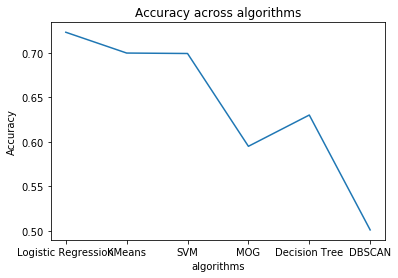

In [91]:
plt.plot(name,sacc)
plt.xlabel('algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy across algorithms')

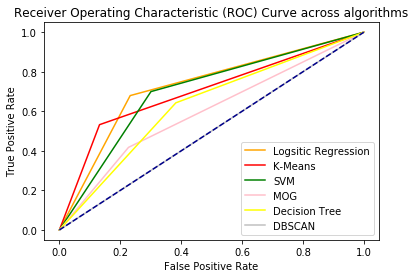

In [92]:
plt.plot(fper_lr, tper_lr, color='orange', label='Logsitic Regression')
plt.plot(fper_k, tper_k, color='red', label='K-Means')
plt.plot(fper_s, tper_s, color='green', label='SVM')
plt.plot(fper_m, tper_m, color='pink', label='MOG')
plt.plot(fper_d, tper_d, color='yellow', label='Decision Tree')
plt.plot(fper_db, tper_db, color='silver', label='DBSCAN')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve across algorithms')
plt.legend()
plt.show()

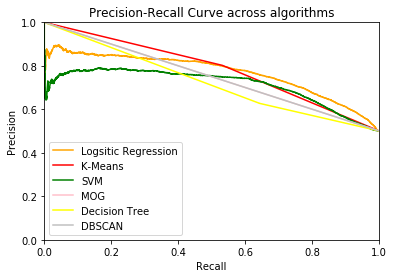

In [93]:
plt.plot(recall_lr, prec_lr, color='orange', label='Logsitic Regression')
plt.plot(recall_k, prec_k, color='red', label='K-Means')
plt.plot(recall_s, prec_s, color='green', label='SVM')
plt.plot(recall_m, prec_m, color='pink', label='MOG')
plt.plot(recall_d, prec_d, color='yellow', label='Decision Tree')
plt.plot(recall_db, prec_db, color='silver', label='DBSCAN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve across algorithms')
plt.legend()
plt.show()